[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.jupyter.org/github/open-atmos/PySDM-examples/blob/main/PySDM_examples/deJong_Mackay_2022/box_sensitivities.ipynb)    
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM-examples.git/main?urlpath=PySDM_examples/deJong_Mackay_2022/box_sensitivities.ipynb)    
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM-examples/blob/main/PySDM_examples/deJong_Mackay_2022/box_sensitivities.ipynb)

In [5]:
from matplotlib import pyplot
import matplotlib
from PySDM_examples.deJong_Mackay_2022 import Settings0D
from PySDM_examples.deJong_Mackay_2022 import run_box_breakup
from open_atmos_jupyter_utils import show_plot
import numpy as np

from PySDM.dynamics.collisions.coalescence_efficiencies import ConstEc, Straub2010Ec
from PySDM.dynamics.collisions.breakup_fragmentations import Gaussian, AlwaysN, Straub2010Nf
from PySDM.physics.constants import si

## Sensitivity to Ec (coalescence efficiency)

finished Ec=1.0
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [9.9905939e+05 7.2300000e+00 9.9905939e+05 0.0000000e+00]
 [9.2609000e+02 0.0000000e+00 9.2609000e+02 0.0000000e+00]]
finished Ec=0.95
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.44062363e+06 0.00000000e+00 1.37098999e+06 6.71254900e+04]
 [1.27792500e+04 0.00000000e+00 1.21133200e+04 6.16860000e+02]]
finished Ec=0.9
[[      0.         0.         0.         0.  ]
 [2286760.19       0.   2064717.24  211255.34]
 [ 191658.57       0.    172573.36   18078.2 ]]
finished Ec=0.8
[[      0.         0.         0.         0.  ]
 [6141548.73       0.   4927088.21 1154640.14]
 [9407884.3        0.   7539736.29 1768159.85]]
finished Straub
[[      0.         0.         0.         0.  ]
 [1014761.14       0.   1011827.82    2749.64]
 [   9361.68       0.      8055.76    1211.94]]


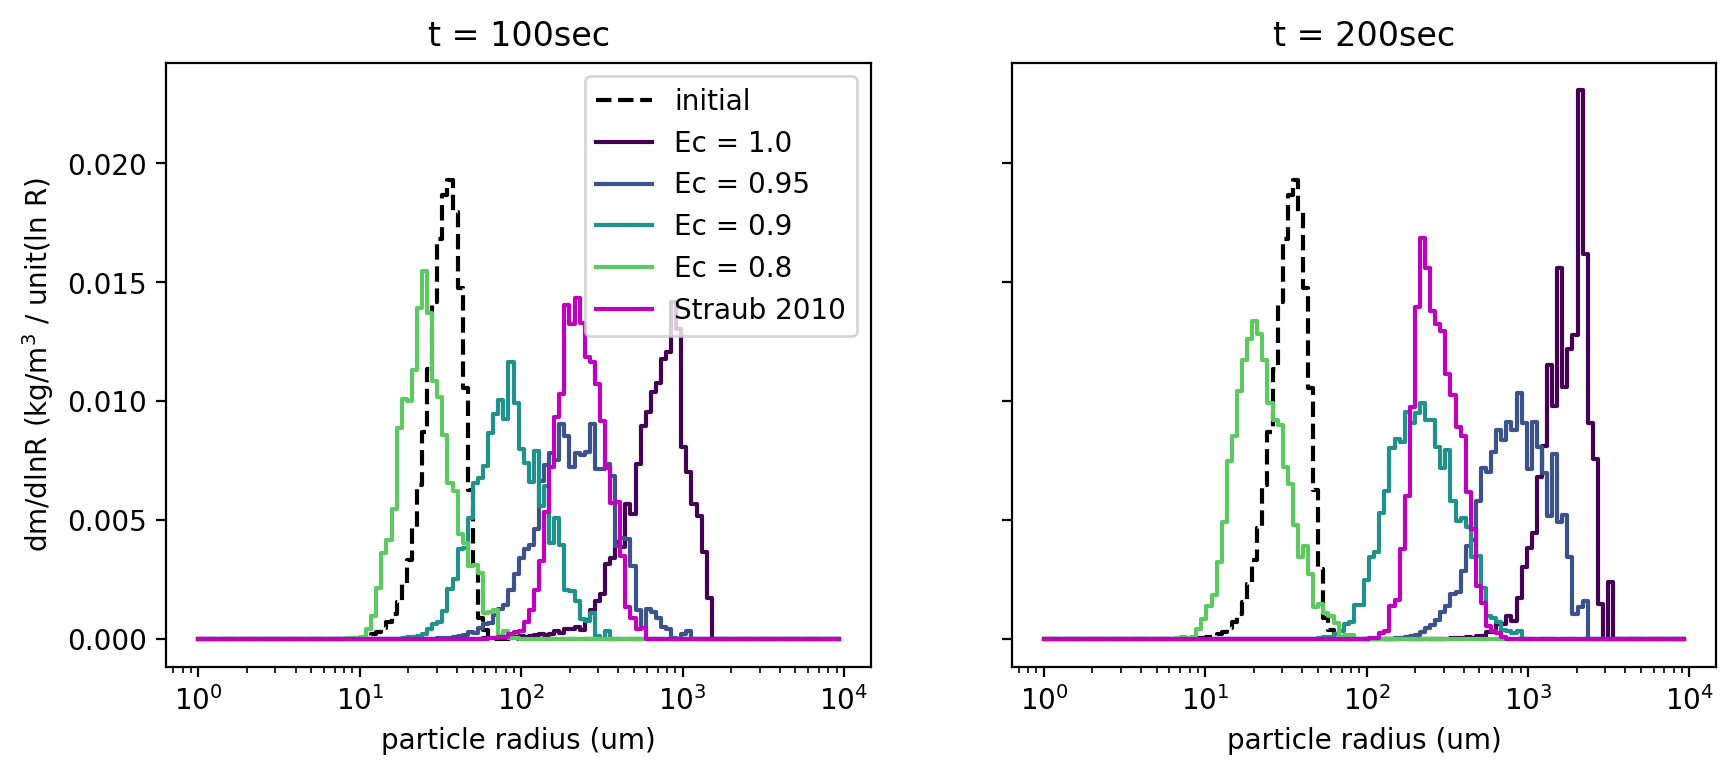

HTML(value="<a href='./fig3_Ec_sensitivity.pdf' target='_blank'>./fig3_Ec_sensitivity.pdf</a><br>")

In [2]:
rmin = 0.1 * si.um
vmin = 4/3 * np.pi * rmin**3
settings = Settings0D(fragmentation=AlwaysN(n=8, vmin=vmin))

settings.n_sd = 2**13
settings.radius_bins_edges = np.logspace(
    np.log10(1.0 * si.um), np.log10(10000 * si.um), num=128, endpoint=True
)

settings.warn_overflows = False
settings._steps = [0, 100, 200]  # pylint: disable=protected-access
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

Ec_vals = [1.0, 0.95, 0.9, 0.8]

(x,y,rates) = run_box_breakup(settings, [0])
fig, ax = pyplot.subplots(ncols=2,sharey=True,figsize=(10,4),dpi=200)
ax[0].step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial')
ax[1].step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial')

for (i, Ec) in enumerate(Ec_vals):
    settings.coal_eff = ConstEc(Ec=Ec)
    (x,y,rates) = run_box_breakup(settings)
    print("finished Ec="+str(Ec))
    for (j, step) in enumerate(settings._steps):  # pylint: disable=protected-access
        if j == 0:
            continue
        lbl = 'Ec = ' + str(Ec)
        if Ec == 1.0:
            lbl = 'Ec = 1.0'
        ax[j-1].step(x,y[j]*settings.rho, color=cmap(i/len(Ec_vals)),#linestyle='--',
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
    print(rates)


settings.coal_eff = Straub2010Ec()
(x,y,rates) = run_box_breakup(settings)
for (j, step) in enumerate(settings._steps):  # pylint: disable=protected-access
    if j == 0:
        continue
    lbl = 'Straub 2010'
    ax[j-1].step(x,y[j]*settings.rho, color='m', label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
print("finished Straub")
print(rates)

ax[0].set_xscale("log")
ax[1].set_xscale("log")
ax[0].set_xlabel("particle radius (um)")
ax[1].set_xlabel("particle radius (um)")
ax[0].set_ylabel("dm/dlnR (kg/m$^3$ / unit(ln R)")
ax[0].legend()
ax[0].set_title("t = 100sec")
ax[1].set_title("t = 200sec")
show_plot('fig3_Ec_sensitivity.pdf')

## Sensitivity to n_f

finished nf=1
[[     0.              0.              0.              0.        ]
 [833086.71666667      0.         792305.66666667  40780.25      ]]
finished nf=4
[[     0.              0.              0.              0.        ]
 [965671.78333333      0.         919954.41666667  45319.66666667]]
finished nf=16
[[      0.               0.               0.               0.        ]
 [1953240.74166667       0.         1858667.28333333   83651.6       ]]
finished nf=64
[[       0.                0.                0.                0.        ]
 [25506478.875             0.         24223189.23333333   803231.13333333]]
4.768389119586232e-13 [[      0.               0.               0.               0.        ]
 [1064064.04166667       0.         1053266.26666667    9031.325     ]]
1.192097279896558e-13 [[      0.               0.               0.               0.        ]
 [1806183.15             0.         1788904.10833333    9324.74166667]]
2.980243199741395e-14 [[      0.               0

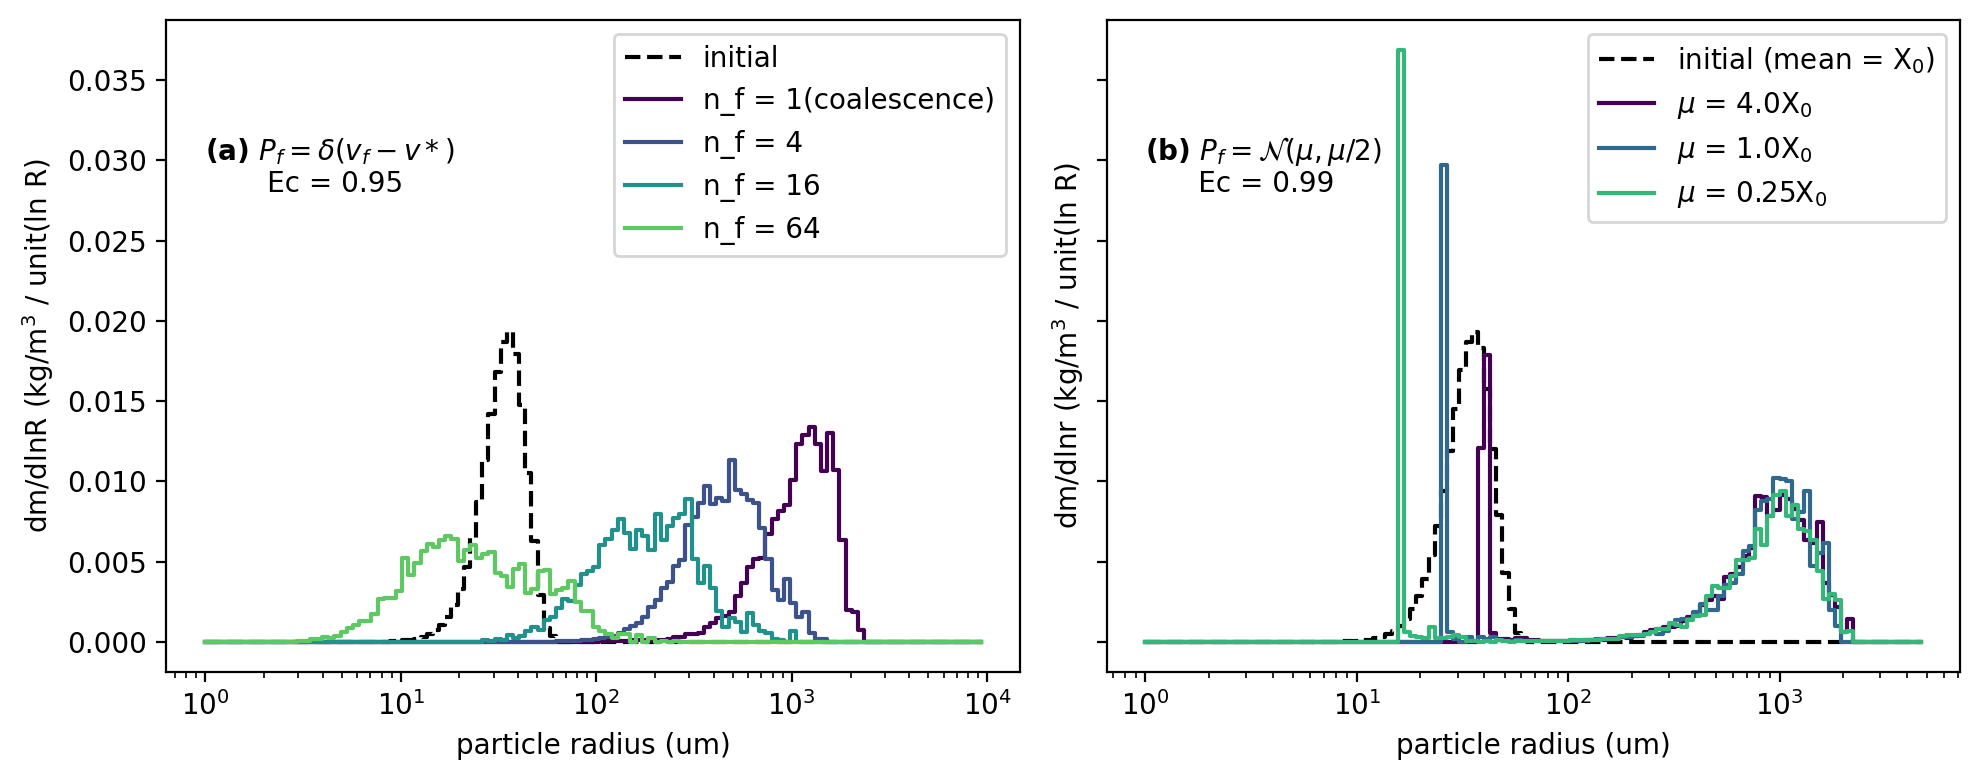

HTML(value="<a href='./fig4_Pf_sensitivity_constEc.pdf' target='_blank'>./fig4_Pf_sensitivity_constEc.pdf</a><…

In [3]:
# Constant n_f
settings0 = Settings0D()
settings0.coal_eff = ConstEc(Ec=0.95)
settings0.n_sd = 2**13
settings0.radius_bins_edges = np.logspace(
    np.log10(1e0 * si.um), np.log10(1e4 * si.um), num=128, endpoint=True
)
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []
nf_vals = [1, 4, 16, 64]
(x,y,rates) = run_box_breakup(settings0, [0])

fig, ax = pyplot.subplots(ncols=2,sharey=True,figsize=(10,4),dpi=200)
ax[0].step(x,y[0]*settings0.rho, color='k', linestyle='--', label='initial')
for (i, nf) in enumerate(nf_vals):
    settings = Settings0D(fragmentation=AlwaysN(n=nf))
    settings._steps = [0, 120]  # pylint: disable=protected-access
    settings.dt = 1 * si.s
    settings.coal_eff = settings0.coal_eff
    settings.n_sd = settings0.n_sd
    settings.radius_bins_edges = settings0.radius_bins_edges
    settings.warn_overflows = False

    (x,y,rates) = run_box_breakup(settings)
    print("finished nf="+str(nf))
    for (j, step) in enumerate(settings._steps):  # pylint: disable=protected-access
        if j == 0:
            continue
        lbl = 'n_f = ' + str(nf)
        if nf == 1:
            lbl += '(coalescence)'
        ax[0].step(x,y[j]*settings.rho, color=cmap(i/len(nf_vals)),
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
    print(rates)
ax[0].set_xscale("log")
ax[0].set_xlabel("particle radius (um)")
ax[0].set_ylabel("dm/dlnR (kg/m$^3$ / unit(ln R)")
ax[0].legend()
ax[0].annotate(r"(a) $P_f = \delta(v_f - v*)$", [1.0, 0.03], weight='bold')
ax[0].annotate(r"       Ec = 0.95", [1.0, 0.028])


# Gaussian fragmentation
settings0 = Settings0D()
settings0.n_sd = 2**13
settings0.radius_bins_edges = np.logspace(
            np.log10(1.0 * si.um), np.log10(5000 * si.um), num=128, endpoint=True
        )
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

X0 = settings0.X0
mu_vals = [4*X0, X0, X0/4]
vmin = 0.0
nfmax = None
Ec = 0.99
settings0.coal_eff=ConstEc(Ec=Ec)

(x,y,rates) = run_box_breakup(settings0, [0])
ax[1].step(x,y[0]*settings0.rho, color='k', linestyle='--', label='initial (mean = X$_0$)')
for (i, mu) in enumerate(mu_vals):
    settings = Settings0D(fragmentation=Gaussian(mu=mu, sigma=mu/2, vmin=vmin, nfmax=nfmax))
    settings._steps = [0, 120]  # pylint: disable=protected-access
    settings.dt = 1 * si.s
    settings.warn_overflows = False
    settings.coal_eff = settings0.coal_eff
    settings.n_sd = settings0.n_sd
    settings.radius_bins_edges = settings0.radius_bins_edges

    (x,y, rates) = run_box_breakup(settings)
    print(mu, rates)
    for (j, step) in enumerate(settings._steps):  # pylint: disable=protected-access
        if j == 0:
            continue
        lbl = r'$\mu$ = ' + str(round(mu/X0,2)) + 'X$_0$'
        ax[1].step(x,y[j]*settings.rho, color=cmap(i/len(mu_vals)),linestyle='-',
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')

ax[1].set_xscale("log")
ax[1].set_xlabel("particle radius (um)")
ax[1].set_ylabel("dm/dlnr (kg/m$^3$ / unit(ln R)")
ax[1].legend()
ax[1].annotate(r"(b) $P_f = \mathcal{N}(\mu,\mu/2)$", [1.0, 0.03], weight='bold')
ax[1].annotate(r"      Ec = 0.99", [1.0, 0.028],)
pyplot.tight_layout()
show_plot('fig4_Pf_sensitivity_constEc.pdf')

## Fully Stochastic: Straub 2010

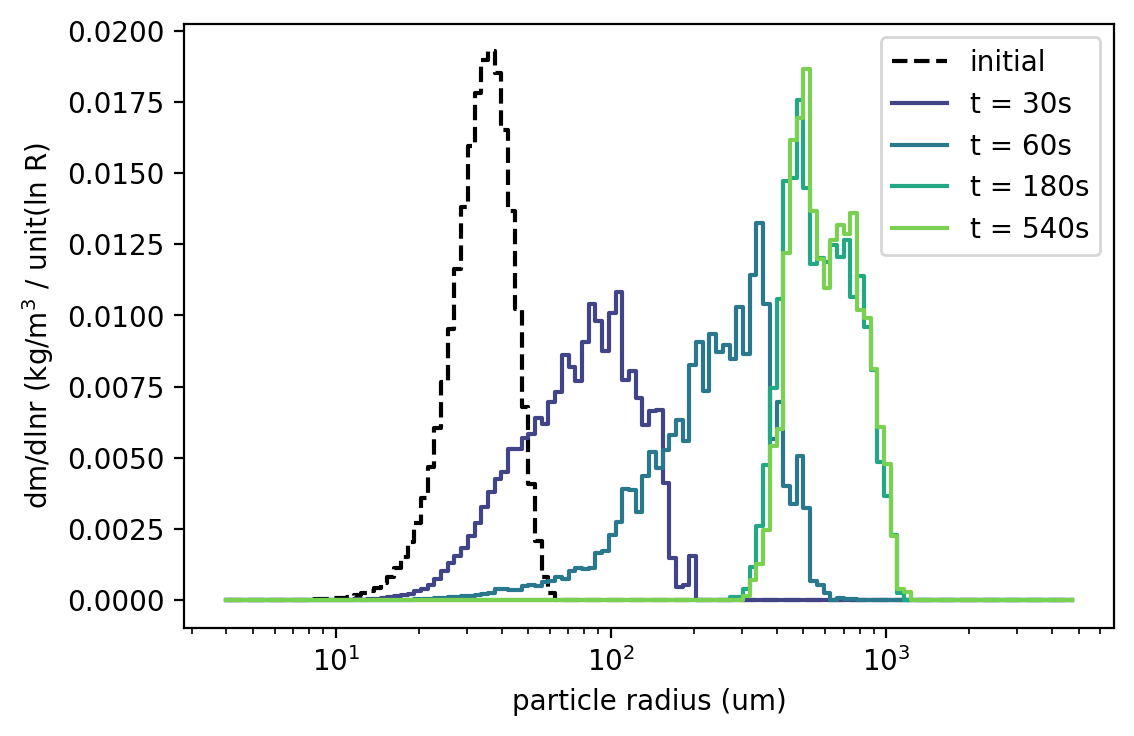

HTML(value="<a href='./fig5_straub_box.pdf' target='_blank'>./fig5_straub_box.pdf</a><br>")

In [4]:
settings = Settings0D(fragmentation=Straub2010Nf(vmin=vmin, nfmax=nfmax))
settings._steps = [0, 30, 60, 180, 540]  # pylint: disable=protected-access
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

settings.n_sd = 2**13
settings.warn_overflows = False
settings.radius_bins_edges = np.logspace(
            np.log10(4.0 * si.um), np.log10(5e3 * si.um), num=128, endpoint=True
        )
vmin = X0 * 1e-3
nfmax = 10
settings.coal_eff=Straub2010Ec()

(x,y,rates) = run_box_breakup(settings, [0])
pyplot.figure(figsize=(6,4),dpi=200)
pyplot.step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial')

(x,y, rates) = run_box_breakup(settings)
for (j, step) in enumerate(settings._steps):  # pylint: disable=protected-access
    if j == 0:
        continue
    pyplot.step(
        x,y[j] * settings.rho,
        color=cmap(j/len(settings._steps)),  # pylint: disable=protected-access
        linestyle='-',
        label=f't = {step}s'
    )

pyplot.xscale("log")
pyplot.xlabel("particle radius (um)")
pyplot.ylabel("dm/dlnr (kg/m$^3$ / unit(ln R)")
pyplot.legend()
show_plot('fig5_straub_box.pdf')